In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def display_img(img,cmap = 'gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap = 'gray')

In [3]:
sep_coins = cv2.imread('DATA/pennies.jpg')

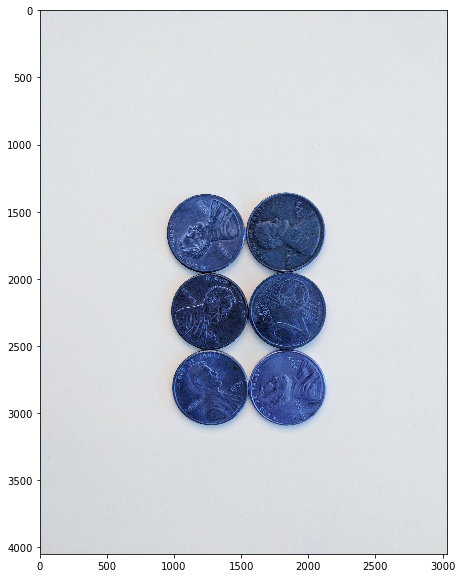

In [4]:
display_img(sep_coins)

In [5]:
###### STEPS ######

# Median Blur
# Grayscale
# Binary Threshold
# Find Contours

In [6]:
sep_blur = cv2.medianBlur(sep_coins,25)

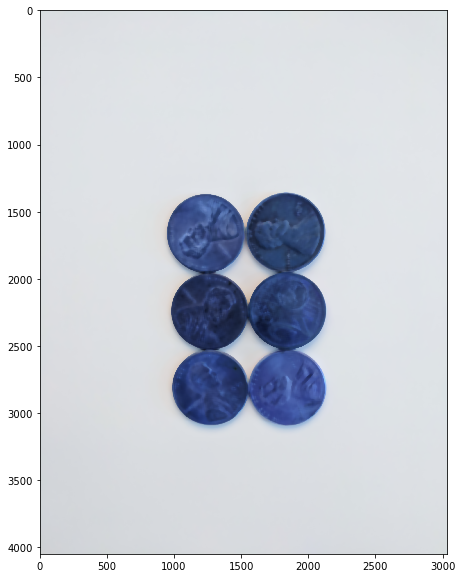

In [7]:
display_img(sep_blur)

In [8]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

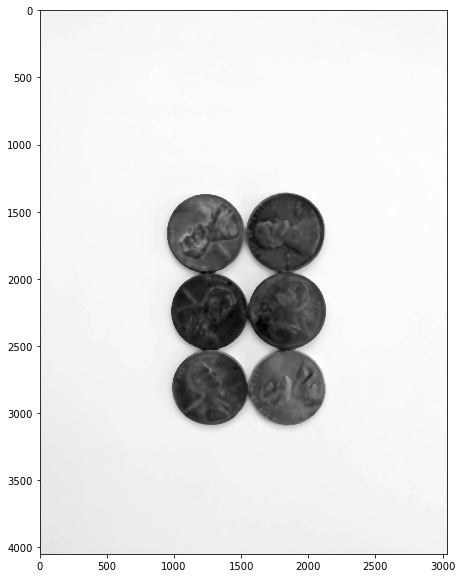

In [9]:
display_img(gray_sep_coins)

In [10]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

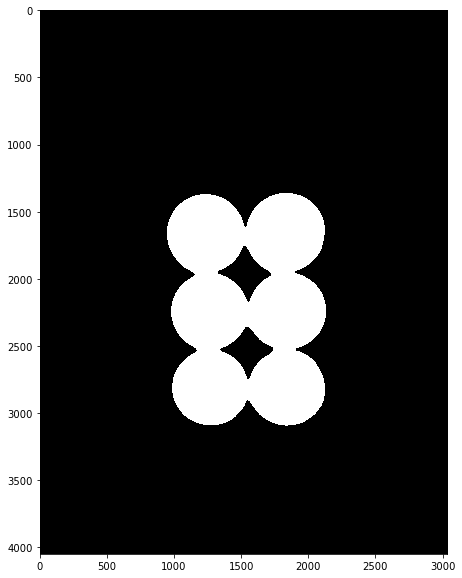

In [11]:
display_img(sep_thresh)

In [12]:
image,contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [13]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

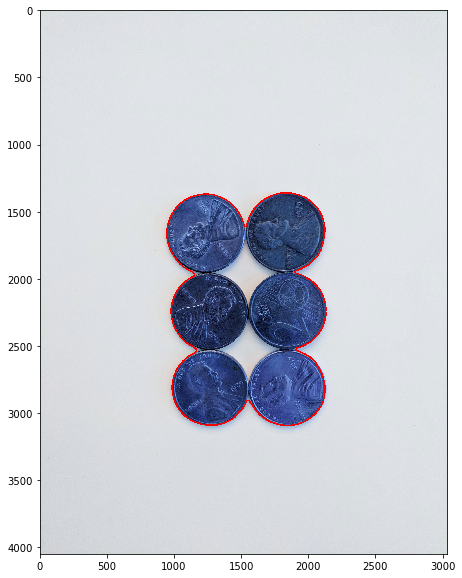

In [14]:
display_img(sep_coins)

In [15]:
img = cv2.imread('DATA/pennies.jpg')

In [16]:
img  = cv2.medianBlur(img,35)

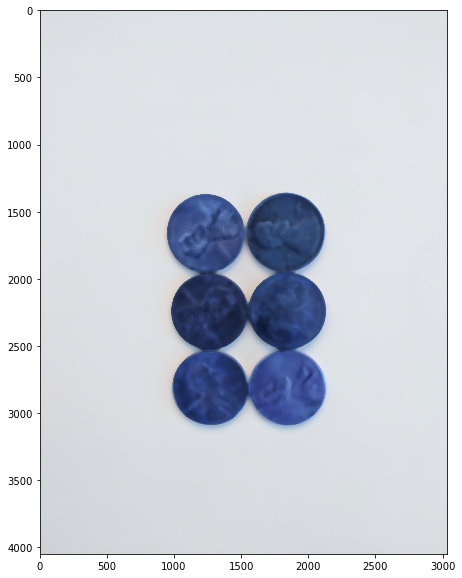

In [17]:
display_img(img)

In [18]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [21]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

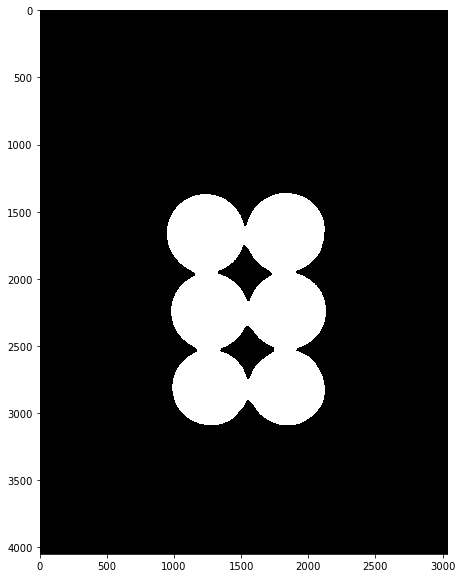

In [22]:
display_img(thresh)

In [23]:
# Noise removal 

In [24]:
kernel = np.ones((3,3),dtype = np.uint8)

In [25]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)

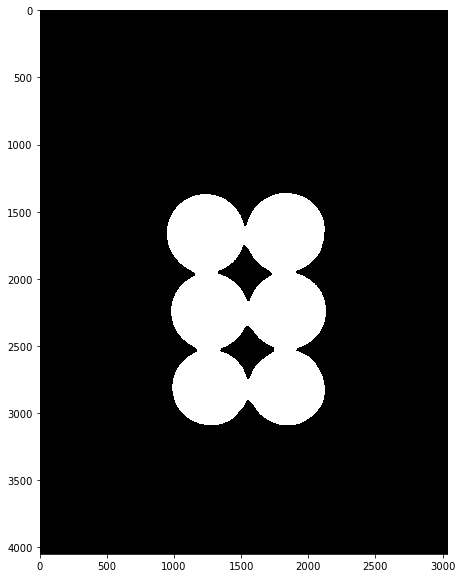

In [26]:
display_img(opening)

In [27]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

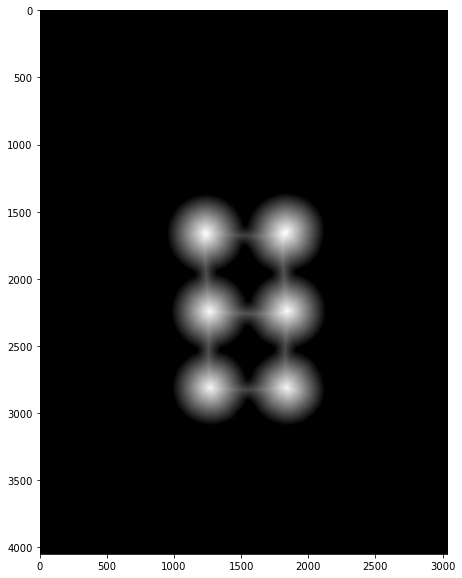

In [28]:
display_img(dist_transform)

In [29]:
ret,sure_fg = cv2.threshold(dist_transform,0.75*dist_transform.max(),255,0)

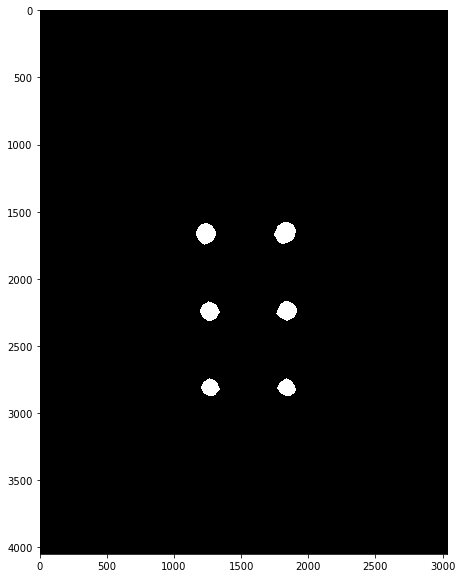

In [33]:
display_img(sure_fg)

In [34]:
sure_bg = cv2.dilate(opening,kernel,3)

In [35]:
sure_fg = np.uint8(sure_fg)

In [36]:
unknown = cv2.subtract(sure_bg,sure_fg)

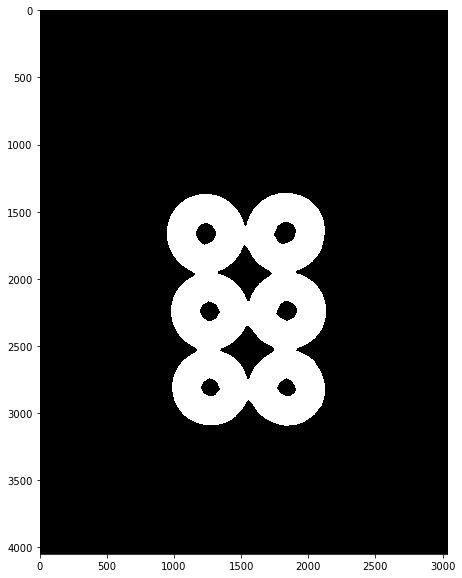

In [37]:
display_img(unknown)

In [38]:
ret, markers = cv2.connectedComponents(sure_fg)

In [40]:
markers = markers + 1

In [41]:
markers[unknown==255] = 0

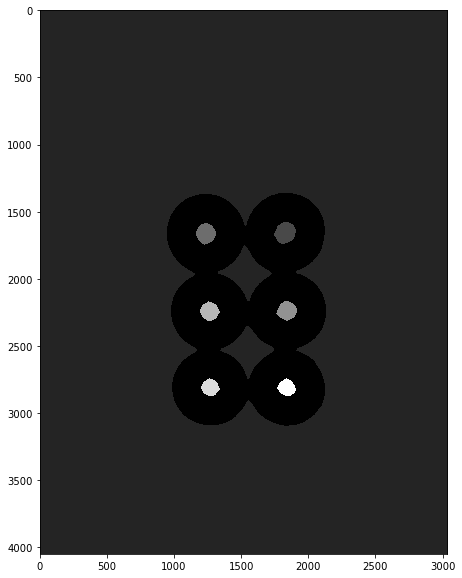

In [42]:
display_img(markers)

In [56]:
markers = cv2.watershed(img,markers)

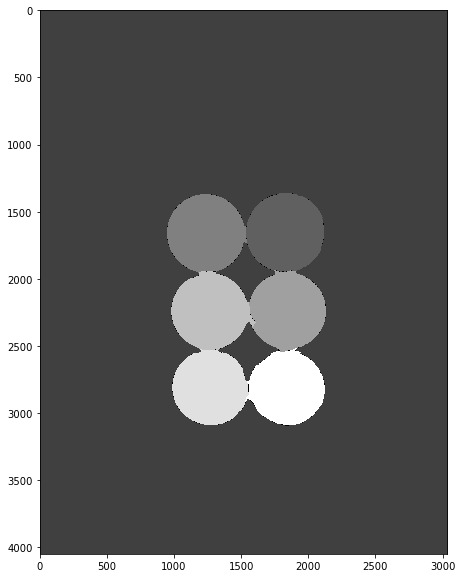

In [55]:
display_img(markers)

In [49]:
image,contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [50]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

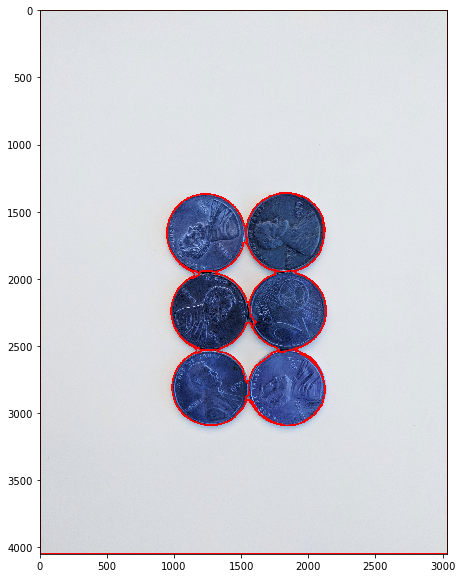

In [51]:
display_img(sep_coins)